# Projeto de Classificação de Frutas

## Importação das bibliotecas

In [39]:
import os
import shutil
import contextlib
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D,AveragePooling2D
from tensorflow.keras.utils import img_to_array , load_img
from keras import preprocessing
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Preparação dos dados

In [22]:
import contextlib
source_dir = 'fruits/fruits-360_dataset/fruits-360/Training'
dest_dir = 'fruits/fruits-360_dataset/fruits-360/Training_30_fruits'

# Cria o diretório de destino se ele não existir
with contextlib.suppress(Exception):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

# Copia as pastas das 30 primeiras frutas para o diretório de destino
fruits = ['Apple Braeburn', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Dates']

with contextlib.suppress(Exception):
    for fruit in fruits:
        src_path = os.path.join(source_dir, fruit)
        dest_path = os.path.join(dest_dir, fruit)
        shutil.copytree(src_path, dest_path)

In [23]:
train_datagen = preprocessing.image.ImageDataGenerator(validation_split=0.20)
train_generator = train_datagen.flow_from_directory(
    'fruits/fruits-360_dataset/fruits-360/Training_30_fruits',
    batch_size=200,
    color_mode='rgb',
    subset='training',
    target_size=(30, 30)
    )


Found 12018 images belonging to 30 classes.


In [24]:
valid_generator = train_datagen.flow_from_directory(
    'fruits/fruits-360_dataset/fruits-360/Training_30_fruits',
    batch_size=200,
    color_mode = 'rgb',
    subset='validation',
    target_size=(30, 30)
    )

Found 2994 images belonging to 30 classes.


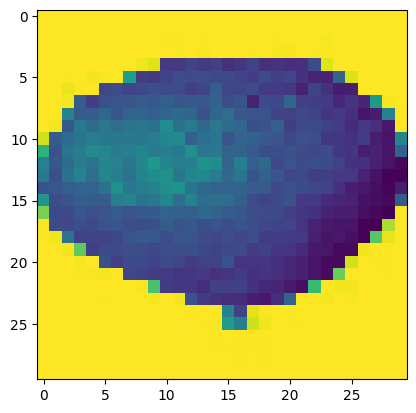

In [25]:
#Visualizando 
x,y = train_generator.next()
for i in range(1):
    image = x[i]   
    plt.imshow(image[:,:,0])
    plt.show()

## Construção do Modelo


In [26]:
num_classes = y[0].shape[0]

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [27]:
# Cria o modelo
model = Sequential()

#Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
model.add(Conv2D(32, (7, 7), input_shape=(30,30,3), activation='relu')) 

#Camada de Pooling 	    
model.add(AveragePooling2D(pool_size=(2, 2)))
	
#Convolução 2D com função de ativação Rectified Linear Units 64 kernels/Pesos (filtros) 
model.add(Conv2D(64, (5, 5), activation='relu'))

#Camada de Pooling 	
model.add(AveragePooling2D(pool_size=(2, 2)))

#Convolução 2D com função de ativação Rectified Linear Units 128 kernels/Pesos (filtros) 
model.add(Conv2D(128, (3, 3), activation='relu'))

#Camada de Pooling 	
model.add(AveragePooling2D(pool_size=(2, 2)))


#Remove 30% dos dados de entrada aleatoriamente 
model.add(Dropout(0.3))

#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# Compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Imprimindo o resumo do modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        4736      
                                                                 
 average_pooling2d_3 (Averag  (None, 12, 12, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 average_pooling2d_4 (Averag  (None, 4, 4, 64)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 average_pooling2d_5 (Averag  (None, 1, 1, 128)       

## Treinamento do Modelo

Agora que temos nosso modelo construído, vamos treiná-lo com nossos dados de treinamento.

In [28]:
mcp_save = ModelCheckpoint('model_best.h5', monitor='val_accuracy', mode= 'auto', save_weights_only=True, save_best_only=True, verbose =1)
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

model.summary()

history = model.fit_generator(train_generator, 
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10, callbacks=[mcp_save])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        4736      
                                                                 
 average_pooling2d_3 (Averag  (None, 12, 12, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 average_pooling2d_4 (Averag  (None, 4, 4, 64)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 average_pooling2d_5 (Averag  (None, 1, 1, 128)       

## Avaliação do Modelo


In [29]:
source_dir = 'fruits/fruits-360_dataset/fruits-360/Test'
dest_dir = 'fruits/fruits-360_dataset/fruits-360/Test_30_fruits'

# Cria o diretório de destino se ele não existir
with contextlib.suppress(Exception):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
        
# Copia as pastas das 30 primeiras frutas para o diretório de destino
fruits = [
    'Apple Braeburn', 'Apple Golden 1', 'Apple Golden 2', 
    'Apple Golden 3', 'Apple Granny Smith', 'Apple Red 1', 
    'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 
    'Apple Red Yellow 1', 'Apricot', 'Avocado', 'Avocado ripe', 
    'Banana', 'Banana Lady Finger', 'Banana Red', 'Cactus fruit', 
    'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cherry 1', 
    'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 
    'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Dates'
    ]

with contextlib.suppress(Exception):
    for fruit in fruits:
        src_path = os.path.join(source_dir, fruit)
        dest_path = os.path.join(dest_dir, fruit)
        shutil.copytree(src_path, dest_path)


In [30]:
test_datagen = preprocessing.image.ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    'fruits/fruits-360_dataset/fruits-360/Test_30_fruits',
    batch_size=1,
    color_mode = 'rgb',    
    target_size=(30, 30))

Found 5035 images belonging to 30 classes.


In [31]:
scores = model.evaluate_generator(test_generator)   
scores

[0.43425965309143066, 0.9006951451301575]

In [32]:
predictions = model.predict_generator(test_generator)
predictions

array([[2.7479538e-13, 2.3601722e-12, 5.7199677e-13, ..., 5.2410697e-11,
        4.2081507e-09, 7.1462103e-15],
       [3.2325060e-15, 2.0923069e-16, 3.4815876e-14, ..., 5.5911374e-13,
        1.4431498e-07, 2.2933384e-09],
       [6.9398839e-14, 5.7964339e-10, 2.9946199e-07, ..., 1.0996514e-12,
        2.6122651e-09, 3.8534051e-11],
       ...,
       [7.1906827e-21, 1.4828883e-17, 2.8458632e-13, ..., 6.0210554e-19,
        2.1319675e-11, 6.3914615e-07],
       [3.0184669e-08, 2.3405114e-01, 7.6104403e-01, ..., 2.9322378e-10,
        7.8184724e-12, 1.0798539e-11],
       [2.6025197e-20, 3.5296641e-26, 1.1245695e-18, ..., 1.7848353e-25,
        9.0154060e-27, 9.9999309e-01]], dtype=float32)

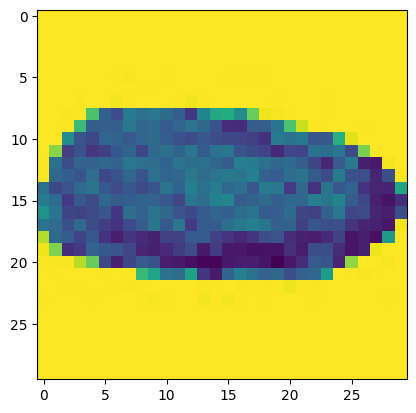

In [34]:
#fileimg = r'D:\digito_7_2SAN.png'
fileimg = r'fruits\fruits-360_dataset\fruits-360\Test_30_fruits\Dates\4_100.jpg'

img = load_img(fileimg , color_mode = "rgb", target_size=(30, 30))

x = img_to_array(img)

plt.imshow(x[:,:,0])
plt.show()

In [35]:
x = np.expand_dims(x, axis=0)
y_pred = model.predict(x)

res = np.argmax(y_pred)
res

1/1 [==============================] - 0s 65ms/step
29


In [36]:
y_pred

array([[2.60251975e-20, 3.52966414e-26, 1.12456952e-18, 9.08801884e-20,
        1.50331598e-23, 1.42736897e-13, 1.70679661e-24, 7.58827595e-15,
        1.55680991e-12, 9.87144328e-24, 1.27463354e-20, 1.88174639e-20,
        7.21665464e-15, 7.41410417e-23, 1.24716337e-15, 6.90849765e-06,
        1.01000111e-26, 3.20733729e-21, 1.88182264e-23, 5.32905663e-27,
        1.48134528e-19, 2.44706446e-14, 2.38085416e-22, 7.42776933e-25,
        4.84674878e-24, 6.61111634e-23, 1.11294179e-15, 1.78483527e-25,
        9.01540595e-27, 9.99993086e-01]], dtype=float32)

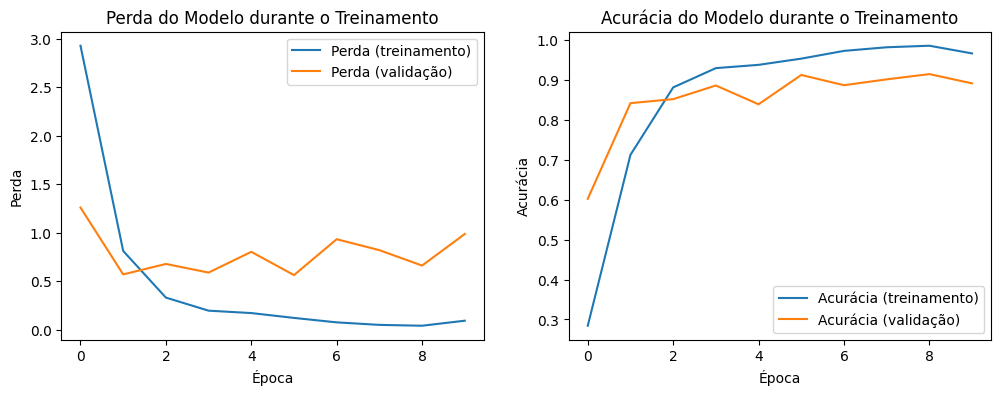

In [37]:
# Plotando as curvas de perda e acurácia durante o treinamento

# Definindo o tamanho da figura
plt.figure(figsize=(12, 4))

# Subplot 1: curva de perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda (treinamento)')
plt.plot(history.history['val_loss'], label='Perda (validação)')
plt.title('Perda do Modelo durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

# Subplot 2: curva de acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia (treinamento)')
plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia do Modelo durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Mostrando a figura
plt.show()